In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

df = pd.read_csv('../data/unove_perfume_reviews.csv')

# 이모지 제거
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['clean_content'] = df['content'].apply(remove_emoji)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')  # 한글 stopword 제거는 따로 커스터마이징 필요
X = vectorizer.fit_transform(df['clean_content'])

# 키워드 확인
keywords = vectorizer.get_feature_names_out()
tfidf_scores = X.sum(axis=0).A1
keyword_scores = pd.Series(tfidf_scores, index=keywords).sort_values(ascending=False)

print(keyword_scores.head(20))


In [ ]:
pip install konlpy wordcloud sklearn matplotlib --quiet

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

df = pd.read_csv('../data/unove_perfume_reviews3.csv')

# 이모지 제거
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['clean_content'] = df['content'].apply(remove_emoji)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')  # 한글 stopword 제거는 따로 커스터마이징 필요
X = vectorizer.fit_transform(df['clean_content'])

# 키워드 확인
keywords = vectorizer.get_feature_names_out()
tfidf_scores = X.sum(axis=0).A1
keyword_scores = pd.Series(tfidf_scores, index=keywords).sort_values(ascending=False)

print(keyword_scores.head(20))


향이      62.524709
너무      61.779532
같아요     38.251772
좋아요     36.095228
어노브     35.714876
향수      31.056405
향을      30.788917
좋은      26.497703
향은      25.756946
은은하게    25.277213
향도      24.135034
정말      23.585970
뿌리고     21.575177
진짜      21.307588
좋아서     20.753465
향이라     20.716584
좋을      20.647690
마음에     20.462771
잔향이     20.294787
않고      20.158178
dtype: float64


In [2]:
!pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   -------- ------------------------------- 2.4/10.7 MB 12.2 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/10.7 MB 11.9 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.7 MB 11.9 MB/s eta 0:00:01
   --------------------------------- ------ 8.9/10.7 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 10.1 MB/s eta 0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [sc

In [4]:
import pandas as pd
import re

# 데이터 불러오기 (파일 경로는 상황에 맞게 조정)
df = pd.read_csv('../data/unove_perfume_reviews3.csv')

# 간단하게 결측치 제거
df = df.dropna(subset=['content'])

# 이모티콘 등 특수문자 제거 함수 (필요시)
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # 이모티콘
                           u"\U0001F300-\U0001F5FF"  # 기호 및 그림 문자
                           u"\U0001F680-\U0001F6FF"  # 운송 및 지도 기호
                           u"\U0001F1E0-\U0001F1FF"  # 국기
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['clean_content'] = df['content'].apply(lambda x: remove_emoji(str(x)))


In [5]:
# 직접 만든 한글 불용어 리스트 예시 (필요에 따라 추가)
stopwords = ['정말', '진짜', '너무', '같아요', '않고', '있어요', '좋아요', '그리고', '하지만', '또한', '더욱이', '좀', '근데', '이제', '그냥']

# 토큰화 및 불용어 제거용 함수
from sklearn.feature_extraction.text import CountVectorizer

def tokenize_and_remove_stopwords(text):
    # 간단하게 띄어쓰기 기준 토큰화 + 불용어 제거
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(tokens)

df['tokenized'] = df['clean_content'].apply(tokenize_and_remove_stopwords)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 벡터라이저: 단어 빈도 기반 벡터 생성
vectorizer = CountVectorizer(max_df=0.9, min_df=5)  # 너무 자주 나오거나 너무 드문 단어 제외
dtm = vectorizer.fit_transform(df['tokenized'])  # 문서-단어 행렬 생성

# LDA 모델 학습 (토픽 수는 5개로 설정, 필요에 따라 조정)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# 토픽별 키워드 확인 함수
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"토픽 {topic_idx+1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)


토픽 1:
향이 | 은은하게 | 향이라 | 시간이 | 기분 | 잔향이 | 로지 | 좋은 | 플로럴 | 데일리로

토픽 2:
향이 | 향을 | 같아요 | ㅎㅎ | 좋은 | 들어요 | 저는 | 살짝 | 향수를 | 마음에

토픽 3:
향이 | 향수 | 어노브 | 다른 | 향은 | 향을 | 좋아서 | 많이 | 있는 | 헤어

토픽 4:
향이 | 향도 | 좋아서 | 좋고 | 뿌리고 | 어노브 | 좋아요 | 은은하게 | 향수 | 이뻐서

토픽 5:
어노브 | 향이 | 향을 | 저는 | 좋을 | 향은 | 같아요 | 제가 | ㅎㅎ | 마음에



In [7]:
def clean_and_tokenize(text):
    # 특수문자 제거 + 소문자화
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.strip().split()
    tokens = [word for word in tokens if word not in stopwords and len(word) > 1]
    return ' '.join(tokens)

df['tokenized'] = df['clean_content'].apply(clean_and_tokenize)


In [8]:
# 재벡터화
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.9, min_df=5)
dtm = vectorizer.fit_transform(df['tokenized'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# 결과 확인
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, 10)


토픽 1:
어노브 | 향을 | 향은 | 향이 | 느낌이 | 좋을 | 좋아서 | 좋은 | 있는 | 중성적인

토픽 2:
향이 | 은은하게 | 시간이 | 향이라 | 기분 | 잔향이 | 있는 | 향수 | 플로럴 | 무겁지

토픽 3:
향이 | 향은 | 향수 | 다른 | ㅎㅎ | 향을 | 은은하게 | 어노브 | 향이에요 | 지속력은

토픽 4:
향이 | 어노브 | 향을 | 좋아서 | 헤어 | 은은하게 | 저는 | 로지 | 좋은 | 장미

토픽 5:
향이 | 향수 | 어노브 | 뿌리고 | 향도 | 향을 | 저는 | 퓨어 | 좋은 | 다른



In [9]:
stopwords = [
    '정말', '진짜', '너무', '같아요', '않고', '있어요', '좋아요', '그리고', '하지만', '또한', '더욱이', '좀',
    '근데', '이제', '그냥', 'ㅎㅎ', 'ㅋㅋ', '저는', '제가', '있는', '했어요', '되네요', '같은', '해서',
    '좋고', '좋을', '좋아서', '좋은', '좋네요', '이뻐서', '이런', '많이', '항상', '조금', '살짝', '더', '것 같아요',
    '향이', '향을', '향은', '향도', '향수'  # 향 관련 단어도 제거할지 여부는 분석 목적에 따라 판단
]


In [10]:
import re

def clean_and_tokenize(text):
    # 이모지 제거 (유니코드 기반 제거)
    text = re.sub(r'[^\w\s]', '', text)
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 공백 기준으로 토큰 분리
    tokens = text.strip().split()
    # 불용어 제거 + 한 글자 단어 제거
    tokens = [word for word in tokens if word not in stopwords and len(word) > 1]
    return ' '.join(tokens)


In [11]:
import pandas as pd

df = pd.read_csv('../data/unove_perfume_reviews3.csv')  # 파일 경로는 상황에 맞게

# 전처리 적용
df['cleaned'] = df['content'].apply(lambda x: clean_and_tokenize(str(x)))



🟨 토픽 1:
어노브 | 향이라 | 은은하게 | 마음에 | 데일리로 | 헤어 | 뿌리고 | 은은한 | 향수를 | 향으로

🟨 토픽 2:
어노브 | 향수를 | 은은하게 | 기분 | 로지 | 패키지도 | 달달한 | 오래 | 퓨어 | 특히

🟨 토픽 3:
은은하게 | 뿌리고 | 어노브 | 같습니다 | 다른 | 맘에 | 장미 | 잔향이 | 선물 | 평소

🟨 토픽 4:
잔향이 | 은은하게 | 어노브 | 다른 | 은은한 | 향으로 | 플로럴 | 마음에 | 패키지가 | 로지

🟨 토픽 5:
마음에 | 향수를 | 다른 | 뿌리고 | 뿌리면 | 예뻐서 | 향이에요 | 은은하게 | 같이 | 플로럴


C:\Users\admin\AppData\Local\Temp\ipykernel_14680\3200156232.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='topic', data=df, palette='pastel')
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPyt

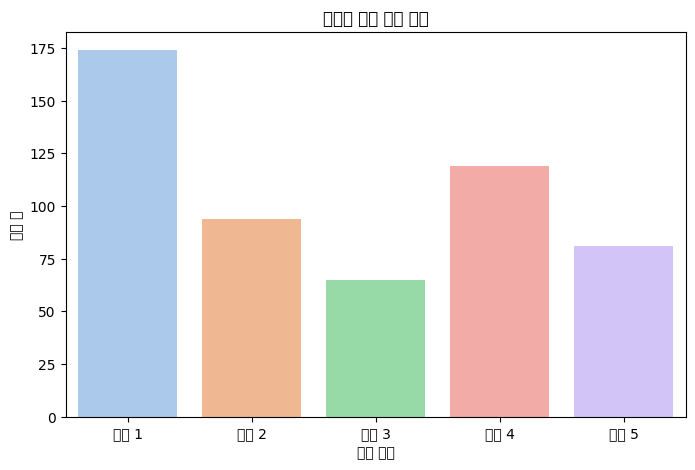

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 벡터화 (단어 수 기반)
vectorizer = CountVectorizer(max_df=0.95, min_df=2)  # 너무 흔한/희귀 단어 제거
dtm = vectorizer.fit_transform(df['cleaned'])

# 2. LDA 모델 훈련 (토픽 수는 3~5 추천)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)

# 3. 토픽별 주요 키워드 출력 함수
def print_topics(model, vectorizer, top_n=10):
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"\n🟨 토픽 {idx+1}:")
        print(" | ".join([terms[i] for i in topic.argsort()[:-top_n - 1:-1]]))

print_topics(lda_model, vectorizer)

# 4. 각 리뷰가 어떤 토픽에 가장 가까운지
topic_distribution = lda_model.transform(dtm)
df['topic'] = topic_distribution.argmax(axis=1)

# 5. 토픽별 리뷰 수 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='topic', data=df, palette='pastel')
plt.title("리뷰별 주요 토픽 분포")
plt.xlabel("토픽 번호")
plt.ylabel("리뷰 수")
plt.xticks([i for i in range(5)], [f"토픽 {i+1}" for i in range(5)])
plt.show()



🟨 토픽 1:
어노브 | 향이라 | 은은하게 | 마음에 | 데일리로 | 헤어 | 뿌리고 | 은은한 | 향수를 | 향으로

🟨 토픽 2:
어노브 | 향수를 | 은은하게 | 기분 | 로지 | 패키지도 | 달달한 | 오래 | 퓨어 | 특히

🟨 토픽 3:
은은하게 | 뿌리고 | 어노브 | 같습니다 | 다른 | 맘에 | 장미 | 잔향이 | 선물 | 평소

🟨 토픽 4:
잔향이 | 은은하게 | 어노브 | 다른 | 은은한 | 향으로 | 플로럴 | 마음에 | 패키지가 | 로지

🟨 토픽 5:
마음에 | 향수를 | 다른 | 뿌리고 | 뿌리면 | 예뻐서 | 향이에요 | 은은하게 | 같이 | 플로럴


C:\Users\admin\AppData\Local\Temp\ipykernel_14680\3200156232.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='topic', data=df, palette='pastel')
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPyt

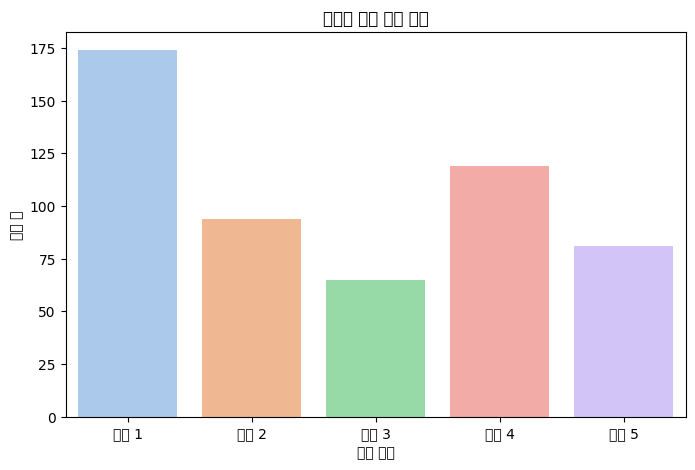

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 벡터화 (단어 수 기반)
vectorizer = CountVectorizer(max_df=0.95, min_df=2)  # 너무 흔한/희귀 단어 제거
dtm = vectorizer.fit_transform(df['cleaned'])

# 2. LDA 모델 훈련 (토픽 수는 3~5 추천)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)

# 3. 토픽별 주요 키워드 출력 함수
def print_topics(model, vectorizer, top_n=10):
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"\n🟨 토픽 {idx+1}:")
        print(" | ".join([terms[i] for i in topic.argsort()[:-top_n - 1:-1]]))

print_topics(lda_model, vectorizer)

# 4. 각 리뷰가 어떤 토픽에 가장 가까운지
topic_distribution = lda_model.transform(dtm)
df['topic'] = topic_distribution.argmax(axis=1)

# 5. 토픽별 리뷰 수 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='topic', data=df, palette='pastel')
plt.title("리뷰별 주요 토픽 분포")
plt.xlabel("토픽 번호")
plt.ylabel("리뷰 수")
plt.xticks([i for i in range(5)], [f"토픽 {i+1}" for i in range(5)])
plt.show()



🟨 토픽 1:
어노브 | 향이라 | 은은하게 | 마음에 | 데일리로 | 헤어 | 뿌리고 | 은은한 | 향수를 | 향으로

🟨 토픽 2:
어노브 | 향수를 | 은은하게 | 기분 | 로지 | 패키지도 | 달달한 | 오래 | 퓨어 | 특히

🟨 토픽 3:
은은하게 | 뿌리고 | 어노브 | 같습니다 | 다른 | 맘에 | 장미 | 잔향이 | 선물 | 평소

🟨 토픽 4:
잔향이 | 은은하게 | 어노브 | 다른 | 은은한 | 향으로 | 플로럴 | 마음에 | 패키지가 | 로지

🟨 토픽 5:
마음에 | 향수를 | 다른 | 뿌리고 | 뿌리면 | 예뻐서 | 향이에요 | 은은하게 | 같이 | 플로럴


C:\Users\admin\AppData\Local\Temp\ipykernel_14680\3200156232.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='topic', data=df, palette='pastel')
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPyt

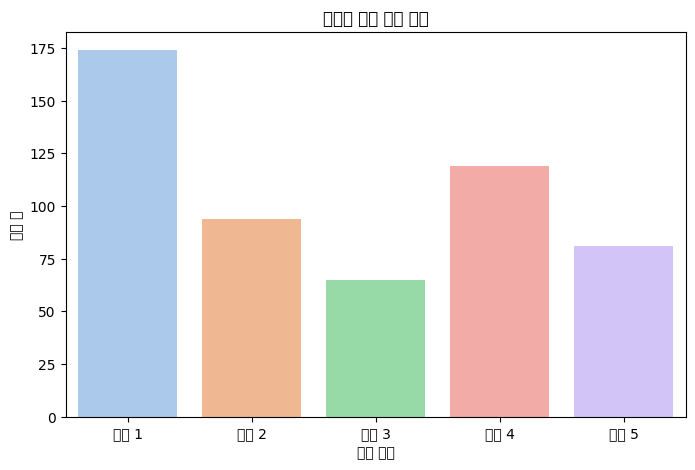

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 벡터화 (단어 수 기반)
vectorizer = CountVectorizer(max_df=0.95, min_df=2)  # 너무 흔한/희귀 단어 제거
dtm = vectorizer.fit_transform(df['cleaned'])

# 2. LDA 모델 훈련 (토픽 수는 3~5 추천)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)

# 3. 토픽별 주요 키워드 출력 함수
def print_topics(model, vectorizer, top_n=10):
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"\n🟨 토픽 {idx+1}:")
        print(" | ".join([terms[i] for i in topic.argsort()[:-top_n - 1:-1]]))

print_topics(lda_model, vectorizer)

# 4. 각 리뷰가 어떤 토픽에 가장 가까운지
topic_distribution = lda_model.transform(dtm)
df['topic'] = topic_distribution.argmax(axis=1)

# 5. 토픽별 리뷰 수 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='topic', data=df, palette='pastel')
plt.title("리뷰별 주요 토픽 분포")
plt.xlabel("토픽 번호")
plt.ylabel("리뷰 수")
plt.xticks([i for i in range(5)], [f"토픽 {i+1}" for i in range(5)])
plt.show()



🟨 토픽 1:
어노브 | 향이라 | 은은하게 | 마음에 | 데일리로 | 헤어 | 뿌리고 | 은은한 | 향수를 | 향으로

🟨 토픽 2:
어노브 | 향수를 | 은은하게 | 기분 | 로지 | 패키지도 | 달달한 | 오래 | 퓨어 | 특히

🟨 토픽 3:
은은하게 | 뿌리고 | 어노브 | 같습니다 | 다른 | 맘에 | 장미 | 잔향이 | 선물 | 평소

🟨 토픽 4:
잔향이 | 은은하게 | 어노브 | 다른 | 은은한 | 향으로 | 플로럴 | 마음에 | 패키지가 | 로지

🟨 토픽 5:
마음에 | 향수를 | 다른 | 뿌리고 | 뿌리면 | 예뻐서 | 향이에요 | 은은하게 | 같이 | 플로럴


C:\Users\admin\AppData\Local\Temp\ipykernel_14680\3200156232.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='topic', data=df, palette='pastel')
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\envs\unove\Lib\site-packages\IPyt

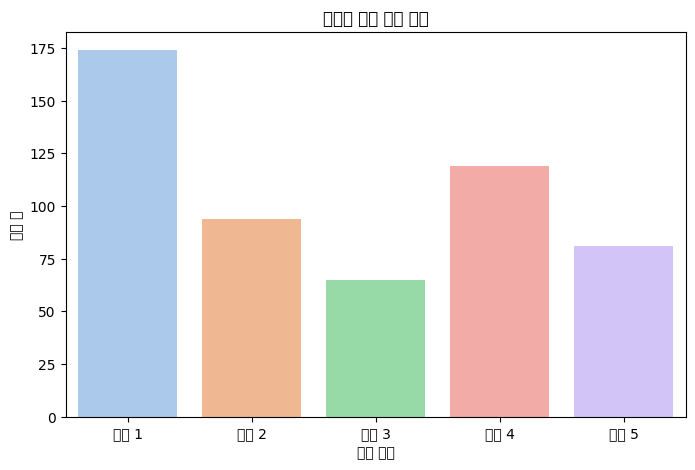

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 벡터화 (단어 수 기반)
vectorizer = CountVectorizer(max_df=0.95, min_df=2)  # 너무 흔한/희귀 단어 제거
dtm = vectorizer.fit_transform(df['cleaned'])

# 2. LDA 모델 훈련 (토픽 수는 3~5 추천)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)

# 3. 토픽별 주요 키워드 출력 함수
def print_topics(model, vectorizer, top_n=10):
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"\n🟨 토픽 {idx+1}:")
        print(" | ".join([terms[i] for i in topic.argsort()[:-top_n - 1:-1]]))

print_topics(lda_model, vectorizer)

# 4. 각 리뷰가 어떤 토픽에 가장 가까운지
topic_distribution = lda_model.transform(dtm)
df['topic'] = topic_distribution.argmax(axis=1)

# 5. 토픽별 리뷰 수 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='topic', data=df, palette='pastel')
plt.title("리뷰별 주요 토픽 분포")
plt.xlabel("토픽 번호")
plt.ylabel("리뷰 수")
plt.xticks([i for i in range(5)], [f"토픽 {i+1}" for i in range(5)])
plt.show()



🟨 토픽 1:
어노브 | 향이라 | 은은하게 | 마음에 | 데일리로 | 헤어 | 뿌리고 | 은은한 | 향수를 | 향으로

🟨 토픽 2:
어노브 | 향수를 | 은은하게 | 기분 | 로지 | 패키지도 | 달달한 | 오래 | 퓨어 | 특히

🟨 토픽 3:
은은하게 | 뿌리고 | 어노브 | 같습니다 | 다른 | 맘에 | 장미 | 잔향이 | 선물 | 평소

🟨 토픽 4:
잔향이 | 은은하게 | 어노브 | 다른 | 은은한 | 향으로 | 플로럴 | 마음에 | 패키지가 | 로지

🟨 토픽 5:
마음에 | 향수를 | 다른 | 뿌리고 | 뿌리면 | 예뻐서 | 향이에요 | 은은하게 | 같이 | 플로럴


C:\Users\admin\AppData\Local\Temp\ipykernel_14680\3200156232.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='topic', data=df, palette='pastel')


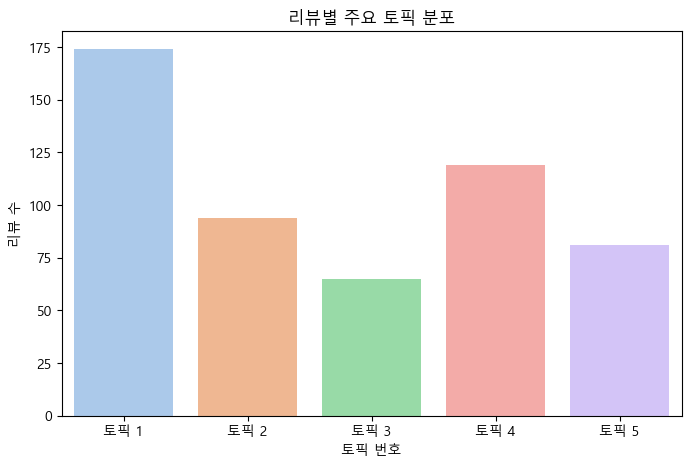

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 벡터화 (단어 수 기반)
vectorizer = CountVectorizer(max_df=0.95, min_df=2)  # 너무 흔한/희귀 단어 제거
dtm = vectorizer.fit_transform(df['cleaned'])

# 2. LDA 모델 훈련 (토픽 수는 3~5 추천)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)

# 3. 토픽별 주요 키워드 출력 함수
def print_topics(model, vectorizer, top_n=10):
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"\n🟨 토픽 {idx+1}:")
        print(" | ".join([terms[i] for i in topic.argsort()[:-top_n - 1:-1]]))

print_topics(lda_model, vectorizer)

# 4. 각 리뷰가 어떤 토픽에 가장 가까운지
topic_distribution = lda_model.transform(dtm)
df['topic'] = topic_distribution.argmax(axis=1)

# 5. 토픽별 리뷰 수 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='topic', data=df, palette='pastel')
plt.title("리뷰별 주요 토픽 분포")
plt.xlabel("토픽 번호")
plt.ylabel("리뷰 수")
plt.xticks([i for i in range(5)], [f"토픽 {i+1}" for i in range(5)])
plt.show()


In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 윈도우의 기본 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지


In [16]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('../data/unove_perfume_reviews3.csv')

# 토픽 번호를 기준으로 리뷰 3개씩 추출
sample_reviews = df.groupby('topic').apply(lambda x: x.sample(n=3, random_state=42))[['topic', 'content']]

# 인덱스 초기화
sample_reviews = sample_reviews.reset_index(drop=True)

# 확인
print(sample_reviews)


KeyError: 'topic'

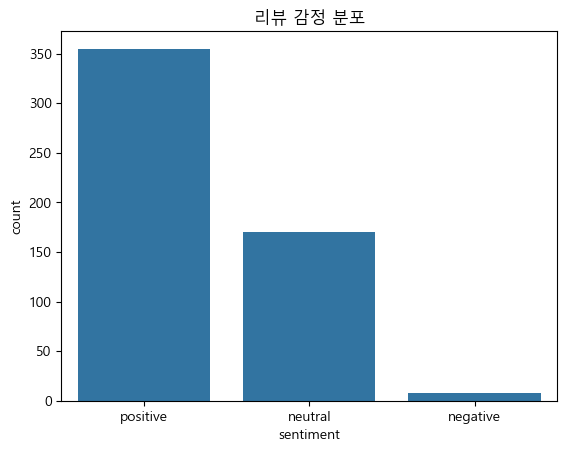

In [17]:
# 1. 긍/부정 키워드 정의 (자주 등장하는 감정 표현 기반)
positive_keywords = ['좋아요', '좋은', '맘에', '사랑스러워요', '추천', '예뻐요', '은은해요', '만족', '기분 좋아요']
negative_keywords = ['별로', '아쉬워요', '실망', '안좋아요', '향이 싫어요', '너무 진해요', '역해요']

def sentiment_by_keywords(text):
    pos_count = sum([word in text for word in positive_keywords])
    neg_count = sum([word in text for word in negative_keywords])
    if pos_count > neg_count:
        return 'positive'
    elif neg_count > pos_count:
        return 'negative'
    else:
        return 'neutral'

# 2. 감정 태깅
df['sentiment'] = df['content'].apply(sentiment_by_keywords)

# 3. 감정 분포 시각화
import seaborn as sns

sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('리뷰 감정 분포')
plt.show()


In [18]:
print(df.columns)

Index(['rating', 'date', 'option', 'content', 'sentiment'], dtype='object')


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 데이터 불러오기 (이미 불러왔다면 생략)
df = pd.read_csv('../data/unove_perfume_reviews3.csv')

# 긍정/부정 리뷰 분리 (중립은 제외)
pos_reviews = df[df['sentiment'] == '긍정']['content']
neg_reviews = df[df['sentiment'] == '부정']['content']

# TF-IDF 벡터라이저로 각 그룹별 단어 중요도 계산
vectorizer = TfidfVectorizer(stop_words='english', max_features=30)  # stop_words는 필요시 조절

pos_tfidf = vectorizer.fit_transform(pos_reviews)
neg_tfidf = vectorizer.fit_transform(neg_reviews)

# 단어별 TF-IDF 점수 합산
pos_scores = pos_tfidf.sum(axis=0).A1
neg_scores = neg_tfidf.sum(axis=0).A1

words = vectorizer.get_feature_names_out()

pos_keywords = pd.DataFrame({'word': words, 'score': pos_scores}).sort_values(by='score', ascending=False)
neg_keywords = pd.DataFrame({'word': words, 'score': neg_scores}).sort_values(by='score', ascending=False)

print("긍정 리뷰 주요 단어")
print(pos_keywords.head(10))
print("\n부정 리뷰 주요 단어")
print(neg_keywords.head(10))


KeyError: 'sentiment'

In [20]:
import pandas as pd

df = pd.read_csv('../data/unove_perfume_reviews3.csv')

# 컬럼명 확인
print(df.columns)

# 컬럼명 공백 제거
df.rename(columns=lambda x: x.strip(), inplace=True)
print(df.columns)

# 감정 컬럼명 확인 후 그 이름으로 변경하세요
sentiment_col = 'sentiment'  # 만약 다른 이름이면 여기에 바꿔서 쓰세요

# 감정 컬럼 존재 확인
if sentiment_col not in df.columns:
    print(f"'{sentiment_col}' 컬럼이 데이터프레임에 없습니다. 컬럼명을 다시 확인해주세요.")
else:
    # 긍정/부정 리뷰만 분리
    pos_reviews = df[df[sentiment_col] == '긍정']['content']
    neg_reviews = df[df[sentiment_col] == '부정']['content']

    print("긍정 리뷰 수:", len(pos_reviews))
    print("부정 리뷰 수:", len(neg_reviews))


Index(['rating', 'date', 'option', 'content'], dtype='object')
Index(['rating', 'date', 'option', 'content'], dtype='object')
'sentiment' 컬럼이 데이터프레임에 없습니다. 컬럼명을 다시 확인해주세요.


In [21]:
df.head()

,rating,date,option,content
0,5,2025.05.18,[옵션] 로지 아우라 향,추가) 지속력이 너무 안좋아요\n헤어미스트보다 지속력짧아요 한두시간 가는거 같아요....
1,5,2025.05.23,NaN,"향이 너무 너무 좋아요,, 배맛 초콜릿 옅게 나는 느낌이에요 배 향이 이렇게 달콤한..."
2,5,2025.05.12,NaN,헤어퍼퓸으로 나왔을때 향수처럼 잘 사용했었는데 퍼퓸으로 나오니까 너무 좋아요 이질감...
3,5,2025.05.18,NaN,"오래 지속되는 잔향 덕분에 하루 종일 기분 좋은 느낌이 들었고, 특별히 리프레쉬하고..."
4,5,2025.06.08,[옵션] 로지 아우라 향,🌹로지 아우라 솔직리뷰🌹\n\n🌹패키지🌹:선물주기 딱 좋은 패키지였어요 예쁘고 색상...


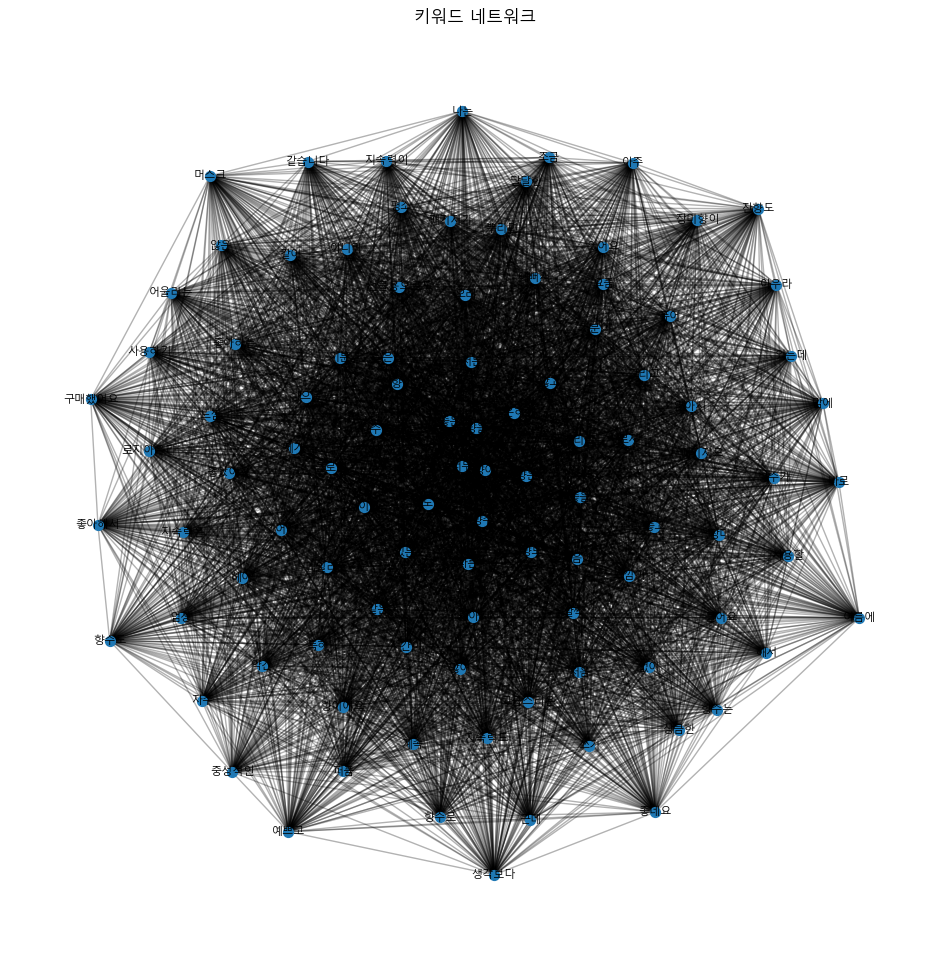

KeyError: 'topic'

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 데이터 불러오기
df = pd.read_csv('../data/unove_perfume_reviews3.csv')

# --- 3. 키워드 네트워크 분석 예시 ---

# 간단한 전처리 예시 (명사/형용사 추출 대신 자주 등장하는 단어 기준)
vectorizer = CountVectorizer(max_features=100, stop_words=['좋아요', '같아요', '정말', '진짜', 'ㅎㅎ'])
X = vectorizer.fit_transform(df['content'])
words = vectorizer.get_feature_names_out()

# 단어 공기 등장 행렬 (단어 쌍 빈도)
co_occurrence = (X.T * X)
co_occurrence.setdiag(0)
co_occurrence = co_occurrence.toarray()

# 네트워크 생성
G = nx.from_numpy_array(co_occurrence)
mapping = {i: word for i, word in enumerate(words)}
G = nx.relabel_nodes(G, mapping)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_family='Malgun Gothic', font_size=8)
plt.title("키워드 네트워크")
plt.axis('off')
plt.show()

# --- 5. 옵션별 리뷰 토픽 분포 예시 ---

topic_counts = df.groupby(['option', 'topic']).size().unstack(fill_value=0)

topic_counts_norm = topic_counts.div(topic_counts.sum(axis=1), axis=0)

topic_counts_norm.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('옵션별 토픽 분포 비율')
plt.xlabel('옵션')
plt.ylabel('비율')
plt.legend(title='토픽 번호')
plt.show()

# 옵션별 주요 키워드 (TF-IDF 상위 단어 추출)

for opt in df['option'].unique():
    opt_texts = df.loc[df['option'] == opt, 'content']
    tfidf = TfidfVectorizer(stop_words=['좋아요', '같아요', '정말', '진짜', 'ㅎㅎ'], max_features=10)
    tfidf_matrix = tfidf.fit_transform(opt_texts)
    print(f"\n옵션: {opt}")
    print("상위 TF-IDF 단어:", tfidf.get_feature_names_out())

# --- 6. 평점별 토픽 분포 시각화 예시 ---

rating_topic = df.groupby(['rating', 'topic']).size().unstack(fill_value=0)

rating_topic_norm = rating_topic.div(rating_topic.sum(axis=1), axis=0)

rating_topic_norm.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('평점별 토픽 분포 비율')
plt.xlabel('평점')
plt.ylabel('비율')
plt.legend(title='토픽 번호')
plt.show()
